In [2]:
from qiskit import *
from qiskit import Aer
from qiskit.circuit import *
backend = Aer.get_backend('unitary_simulator')
import numpy as np
np.set_printoptions(linewidth=200, precision=3, suppress=True)
from qiskit.quantum_info.operators import Operator

first qdsize is 3
[[0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]] 8
Input state is 0b0 and desired state is 0b11
[[0], [1], [2]]
{'011': 1000}


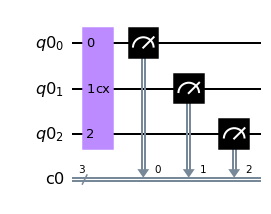

In [3]:
N = 7 #dimension of the QuDit
first_state = 0 #initial State
second_state = 3 #final State

qd_size = int(np.ceil(np.log2(N))) #later not needed
print("first qdsize is", qd_size)
#qd_size = 2

qd = QuantumRegister(qd_size)
cd = ClassicalRegister(qd_size) #for measures, not needed, like measures in the middle of the computation
qdc = QuantumCircuit(qd,cd)

#check if 2**qd_size < first_state and second_state

def qudit_swap(qdcircuit, qd_size, first_state, second_state):
    bin_first_state, bin_second_state = [], []
    
    qd_swap_matrix = []
    for i in range(2**qd_size):
        swap_line = []
        for j in range(2**qd_size):
            if i==j:
                swap_line.append(1)
            else:
                swap_line.append(0)
        qd_swap_matrix.append(swap_line)
        
    qd_swap_matrix[first_state], qd_swap_matrix[second_state] = qd_swap_matrix[second_state], qd_swap_matrix[first_state]
    print(np.matrix(qd_swap_matrix), len(qd_swap_matrix))
    
    print("Input state is", bin(first_state), "and desired state is", bin(second_state))
        
    #initialises the initial state of the QuDit (not needed later)
    #for i in range(qd_size): 
    #    if(bin_first_state[i] == 1):
    #        qdcircuit.x(qd[i])
    
    qubits = []
    for i in range(qd_size):
        qubits.append([i])
        
    print(qubits)


    qdc.unitary(qd_swap_matrix, qubits, label='cx')
            
    #for i in range(qd_size): #The "swap part". I don't use ancillary Qubits BUT i can use some if needed
     #   if(bin_first_state[i] != bin_second_state[i]):
      #      qdcircuit.x(qd[i])
    
    qdcircuit.measure(qd, cd) #optional, just to see if it works
    
    return qdcircuit

qdc = qudit_swap(qdc, qd_size, first_state, second_state)

simulator = Aer.get_backend('qasm_simulator') #simulation part
job = execute(qdc, simulator, shots=1000)
results = job.result()
measures = results.get_counts()
print(measures)

qdc.draw(output = "mpl")
